## 示例: 计算目标检测框重叠面积占比(IoU)
交并比 IoU: Intersection over Union
![20230119112816](https://appen-pe.oss-cn-shanghai.aliyuncs.com/imgupload/20230119112816.png)

POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0))
POLYGON ((1 1, 1 4, 4 4, 4 1, 1 1))
相交面积Overlap:	 1.0
1.并集面积Union:	 12.0
2.并集面积Union:	 12.0
交并比IoU:	8.33%


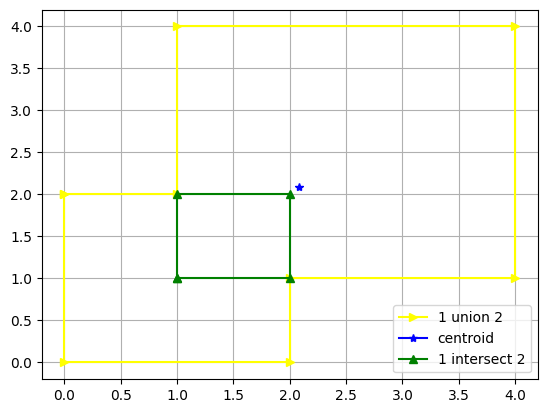

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from shapely import centroid
from shapely.geometry import LinearRing, MultiPoint, Polygon, MultiPolygon
from shapely.ops import unary_union


def make_bbox(ring: list):
    assert len(ring) % 2 == 0, "一维数组表示错误"  # 一维数组表示，[x1,y1,x2,y2,...]
    ring = np.array(ring).reshape(-1, 2)  # 二维坐标表示
    poly = MultiPoint(ring).convex_hull
    return poly


ring1 = [2, 0, 2, 2, 0, 0, 0, 2]
poly1 = make_bbox(ring1)
print(poly1)

ring2 = [1, 1, 4, 1, 4, 4, 1, 4]
poly2 = make_bbox(ring2)
print(poly2)

UNION_METHOD = 2
if UNION_METHOD == 1:
    # union方法一
    intersect_2d = np.array(poly1.intersection(poly2).exterior.coords)
    union_2d = np.array(ring1 + ring2).reshape(-1, 2)
    a = set(tuple(i) for i in intersect_2d)
    b = set(tuple(i) for i in union_2d)
    b.symmetric_difference_update(a)  # same as (a|b)-(a&b)
    union_ring = np.array(list(b))

    union_poly = Polygon(union_ring)
    if union_poly.is_valid == False:
        '''多边形顶点排序'''
        cen_2d = np.mean(union_ring.reshape(-1, 2), axis=0)
        complex_pts = (union_ring[:, 0] + 1j * union_ring[:, 1]) - (
            cen_2d[0] + 1j * cen_2d[1]
        )
        sorted_ring = union_ring[np.angle(complex_pts).argsort()]
        print(sorted_ring)
        union_poly = Polygon(sorted_ring)
else:
    # union方法二，推荐
    m = MultiPolygon([poly1, poly2])
    union_poly = unary_union(m)
    
    

# intersect
intersect_2d = np.array(poly1.intersection(poly2).exterior.coords)
inter_poly = make_bbox(intersect_2d.flatten().tolist())

if not poly1.intersects(poly2):  # 如果两四边形不相交
    iou = 0
else:
    inter_area = poly1.intersection(poly2).area  # 相交面积
    print("相交面积Overlap:\t", inter_area)
    union_area = poly1.area + poly2.area - inter_area
    print("1.并集面积Union:\t", union_area)
    union_area = union_poly.area
    print("2.并集面积Union:\t", union_area)
    if union_area == 0:
        iou = 0
    iou = float(inter_area) / union_area
    print("交并比IoU:\t{:.2f}%".format(iou * 100))

# x, y = poly1.exterior.xy
# plt.plot(x, y, label="poly 1", c="red", marker='o')

# x,y = poly2.exterior.xy
# plt.plot(x, y, label="poly 2", c="blue", marker='s')

x, y = union_poly.exterior.xy
plt.plot(x, y, label="1 union 2", c="yellow", marker=">")

cen_2d = union_poly.centroid.xy
plt.plot(cen_2d[0], cen_2d[1], label="centroid", c="blue", marker="*")

x, y = inter_poly.exterior.xy
plt.plot(x, y, label="1 intersect 2", c="green", marker="^")

plt.grid()
plt.legend()
plt.show()

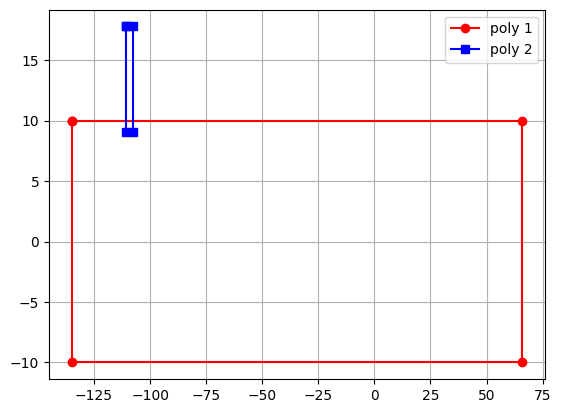

In [2]:
from shapely import Polygon
import matplotlib.pyplot as plt

range_Green = [[10.0, -135.0], [-10.0, -135.0], [-10.0, 66.0], [10.0, 66.0], [10.0, -135.0]]
poly1 = Polygon(range_Green)

lidar_bbox = [[17.7780179977417, -110.55121982097626], [9.094164848327637, -110.55121982097626], [9.094164848327637, -107.49403774738312], [17.7780179977417, -107.49403774738312], [17.7780179977417, -110.55121982097626]]
poly2 = Polygon(lidar_bbox)

x, y = poly1.exterior.xy
plt.plot(y, x, label="poly 1", c="red", marker='o')

x,y = poly2.exterior.xy
plt.plot(y, x, label="poly 2", c="blue", marker='s')
plt.grid()
plt.legend()
plt.show()